In [2]:
import pandas as pd
import os  
import numpy as np
import matplotlib.pyplot as plt
import probabl

In [3]:
import skrub

In [4]:
os.chdir("..")
os.chdir("../data")
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)
df
df=df[df["Consumer disputed?"].isnull()!=True]
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


In [5]:
df.fillna("Unknown or not specified", inplace=True)
df=df[df["Consumer disputed?"]!="Unknown or not specified"]
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
6,1288848,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,44241,2015-03-18,2015-03-18,"CashCall, Inc.",Closed with explanation,Yes,Yes,0 days,Wednesday
9,1288304,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,77433,2015-03-18,2015-03-18,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,0 days,Wednesday
14,1289900,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,84405,2015-03-18,2015-03-18,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,0 days,Wednesday
22,1289844,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,60411,2015-03-18,2015-03-18,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,0 days,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28149,1178177,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,48622,2015-01-01,2015-01-01,Experian,Closed with explanation,Yes,No,0 days,Thursday
28150,1178179,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,72160,2015-01-01,2015-01-01,U.S. Bancorp,Closed with monetary relief,Yes,No,0 days,Thursday
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday


In [6]:
import os
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str









c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
X=df.drop(columns=["Complaint ID", "Timely response?", "Consumer disputed?", "ZIP code","Date received"	,"Date sent to company","dias de retraso" ])
y=df["Consumer disputed?"]
y.replace(["Yes", "No"], [1,0], inplace=True)
from imblearn.over_sampling import ADASYN

C:\Users\unaif\AppData\Local\Temp\ipykernel_20524\1211003259.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(["Yes", "No"], [1,0], inplace=True)
C:\Users\unaif\AppData\Local\Temp\ipykernel_20524\1211003259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(["Yes", "No"], [1,0], inplace=True)


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
k = 2
kmeans = KMeans(n_clusters=k, algorithm='elkan', random_state=24)
one=OneHotEncoder()
X=one.fit_transform(X)


In [9]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 48048 stored elements and shape (6006, 950)>

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 24, shuffle=True)

In [12]:
y_train

26883    0
13080    1
27789    1
12470    1
3293     1
        ..
15080    1
22040    1
2856     1
7125     1
25388    1
Name: Consumer disputed?, Length: 4804, dtype: int64

In [13]:
kmeans.fit(X_train, y_train)

KMeans(algorithm='elkan', n_clusters=2, random_state=24)

In [14]:
y_pred = pd.DataFrame(kmeans.predict(X_test))
y_pred

,0
0,1
1,1
2,1
3,0
4,1
...,...
1197,0
1198,0
1199,1
1200,1


In [15]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )
y_test


,Consumer disputed?
25406,0
13166,1
21915,1
19830,1
19846,1
...,...
14933,1
27786,0
17831,1
9165,1


In [16]:
y_test.value_counts()

Consumer disputed?
1                     946
0                     256
Name: count, dtype: int64

Accuracy: 0.4683860232945091
f1 score: 0.5464868701206529
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.70      0.36       256
           1       0.83      0.41      0.55       946

    accuracy                           0.47      1202
   macro avg       0.54      0.55      0.45      1202
weighted avg       0.71      0.47      0.51      1202

[[0.6953125  0.3046875 ]
 [0.59302326 0.40697674]]
Confusion Matrix:


<Axes: >

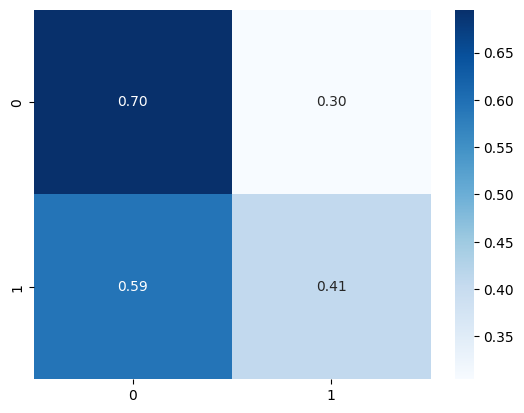

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='true' ))
print("Confusion Matrix:")
heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])


In [20]:
import dill
with open("modelo_cluster.pkl", "wb") as f:
    dill.dump(kmeans, f)